In [2]:
import pandas as pd
import numpy as np

## pd.Series
Seriest is one-dimensional labeled array capable of holding data of any type. Initiation of Series looks like 
```
class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```

In [3]:
some_list = [1, 3, 5, np.nan, 6, 8]; #np.nan is not taken in all computations. Also its necessary to mention that nan in float type
series_1 = pd.Series(data = some_list);
print(series_1);

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [4]:
ind = ["1st day", "2nd day", "3rd day", "4th day", "5th day", "6th day"];

series_2 = pd.Series(data = some_list, name = "Temperature", index = ind);
print(series_2);

1st day    1.0
2nd day    3.0
3rd day    5.0
4th day    NaN
5th day    6.0
6th day    8.0
Name: Temperature, dtype: float64


In [5]:
print(series_2['4th day']);

nan


In [6]:
#indexes work with the same syntax as lists or numpy arrays

print(series_2[0], "\n");
print(series_2[1:3], "\n");
print(series_2[::-1]);

1.0 

2nd day    3.0
3rd day    5.0
Name: Temperature, dtype: float64 

6th day    8.0
5th day    6.0
4th day    NaN
3rd day    5.0
2nd day    3.0
1st day    1.0
Name: Temperature, dtype: float64


In [7]:
#indexes with conditions 
date_range = pd.date_range('20190101', periods = 10);
series_4 = pd.Series(data = np.random.rand(10), index = date_range);
print(series_4);

2019-01-01    0.841734
2019-01-02    0.809161
2019-01-03    0.342323
2019-01-04    0.936081
2019-01-05    0.351614
2019-01-06    0.206163
2019-01-07    0.304646
2019-01-08    0.422872
2019-01-09    0.625746
2019-01-10    0.365136
Freq: D, dtype: float64


In [8]:
#condition 
print(series_4 > 0.5);

2019-01-01     True
2019-01-02     True
2019-01-03    False
2019-01-04     True
2019-01-05    False
2019-01-06    False
2019-01-07    False
2019-01-08    False
2019-01-09     True
2019-01-10    False
Freq: D, dtype: bool


In [9]:
#also u can make calls in such way
print(series_4[series_4 > 0.5]);

2019-01-01    0.841734
2019-01-02    0.809161
2019-01-04    0.936081
2019-01-09    0.625746
dtype: float64


In [10]:
print(series_4[(series_4 > 0.6) & (series_4 < 0.2)]);
# AND = &, OR = | in pandas syntax 

Series([], Freq: D, dtype: float64)


### Sorts 
pd.Series can be sorted by values or by indexes 
```
pd.Series.sort_index()
pd.Series.sort_values()
```

In [11]:
series_4.sort_index();

In [12]:
series_4.sort_values();

In [13]:
#Data in series can be treated as numpy array
series_4 + series_1;
print(np.sin(series_4));

2019-01-01    0.745799
2019-01-02    0.723708
2019-01-03    0.335676
2019-01-04    0.805240
2019-01-05    0.344413
2019-01-06    0.204706
2019-01-07    0.299955
2019-01-08    0.410381
2019-01-09    0.585702
2019-01-10    0.357076
Freq: D, dtype: float64


### pd.DataFrame
pd.DataFrame is 2 dimensional structure with indexes and columns. DataFrame could be built from Dictionary or array[x][y]
```
class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
```

In [14]:
#Dictionary initialization 
some_dict = {'one': pd.Series([1, 2, 3], index = ['a','b', 'c']),
             'two': pd.Series([1, 2, 3, 4], index = ['a','b', 'c', 'd']),
             'three': pd.Series([5, 6, 7, 8], index = ['a','b', 'c', 'd'])};
frame_1 = pd.DataFrame(some_dict);
print(frame_1);

   one  two  three
a  1.0    1      5
b  2.0    2      6
c  3.0    3      7
d  NaN    4      8


In [15]:
#Lists initialization
some_array =[[1, 1, 5], [2, 2, 6], [3, 7, 7], [np.nan, 4, 8]];
frame_2 = pd.DataFrame(data = some_array, index = ['a', 'b', 'c', 'd'], columns = ['one', 'two', "three"]);
print(frame_2);


   one  two  three
a  1.0    1      5
b  2.0    2      6
c  3.0    7      7
d  NaN    4      8


In [16]:
print(frame_2.values); #to get values 

[[ 1.  1.  5.]
 [ 2.  2.  6.]
 [ 3.  7.  7.]
 [nan  4.  8.]]


In [17]:
print(frame_2.columns); #to get columns

Index(['one', 'two', 'three'], dtype='object')


In [18]:
frame_2.columns = ['first_column', 'second_column', 'third_column'];
frame_2.index = [1, 2, 3, 4];

### Index 
By columns (returns pd.Series)

In [19]:
first_column = frame_2['first_column'];
print(first_column);

1    1.0
2    2.0
3    3.0
4    NaN
Name: first_column, dtype: float64


In [20]:
subset_dataframe = frame_2[['first_column', 'second_column']];
print(subset_dataframe);

   first_column  second_column
1           1.0              1
2           2.0              2
3           3.0              7
4           NaN              4


In [21]:
print(subset_dataframe['first_column']);

1    1.0
2    2.0
3    3.0
4    NaN
Name: first_column, dtype: float64


### .loc and .iloc

In [22]:
#by index
print(frame_2.iloc[1:3, :2]); # [1; 3)

   first_column  second_column
2           2.0              2
3           3.0              7


In [23]:
print(frame_2.loc[1:3, ['first_column', 'second_column']]); # [1, 3]

   first_column  second_column
1           1.0              1
2           2.0              2
3           3.0              7


### Modification of data_set 

In [24]:
new_column = [5, 2, 1, 4];
frame_2['new_column'] = new_column;
print(frame_2);

   first_column  second_column  third_column  new_column
1           1.0              1             5           5
2           2.0              2             6           2
3           3.0              7             7           1
4           NaN              4             8           4


In [25]:
frame_2['first_column'] /= 10;
print(frame_2);

   first_column  second_column  third_column  new_column
1           0.1              1             5           5
2           0.2              2             6           2
3           0.3              7             7           1
4           NaN              4             8           4


### Working with Titanic DataSet
`titanic_data.csv` - all information of passengers

`titanic_surv.csv` - information about surviaval of passenger

In [26]:
#initialization
# df_1 = pd.read_csv('titanic_data.csv');
pass_link = 'https://www.dropbox.com/s/lyzcuxu1pdrw5qb/titanic_data.csv?dl=1';
titanic_passengers = pd.read_csv(pass_link, index_col = 'PassengerId');

In [27]:
print('Passengers: ', len(titanic_passengers));
titanic_passengers.head(10)

Passengers:  891


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [28]:
print(titanic_passengers.shape); #shape of data

(891, 10)


In [29]:
print(titanic_passengers.info()); #type and num of elements in column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB
None


In [30]:
print(titanic_passengers.describe());

           Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200


In [31]:
print('Mean Age of Passenger is: ', titanic_passengers['Age'].mean());

Mean Age of Passenger is:  29.69911764705882


In [32]:
print(titanic_passengers['Sex'].value_counts());

male      577
female    314
Name: Sex, dtype: int64


In [33]:
print(titanic_passengers['Pclass'].value_counts().sort_values());

2    184
1    216
3    491
Name: Pclass, dtype: int64


##### Usage of `pandas.DataFrame.groupby` method

In [34]:
print(titanic_passengers.groupby(['Pclass']).mean());

              Age     SibSp     Parch       Fare
Pclass                                          
1       38.233441  0.416667  0.356481  84.154687
2       29.877630  0.402174  0.380435  20.662183
3       25.140620  0.615071  0.393075  13.675550


##### Usage of `pandas.join` method

In [35]:
survival = pd.read_csv('https://www.dropbox.com/s/v35x9i6a1tc7emm/titanic_surv.csv?dl=1');

In [36]:
survival.index = np.arange(1, 892);
survival.head(10)

,Survived
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,1
10,1


In [37]:
survival = survival.sample(frac = 1);

In [38]:
titanic_passengers = titanic_passengers.join(survival);
titanic_passengers.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1


In [39]:
print(titanic_passengers['Survived'].value_counts());

0    549
1    342
Name: Survived, dtype: int64


In [40]:
data_group_by_sex = titanic_passengers.groupby(['Sex']);
print(data_group_by_sex['Survived'].sum());

Sex
female    233
male      109
Name: Survived, dtype: int64


In [41]:
correlation_data = titanic_passengers[['Sex', 'Age', 'Survived']];
correlation_data['Sex'] = (correlation_data['Sex'] == 'female').astype(int)
correlation_data.head(10)

/tmp/ipykernel_6406/1122245882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation_data['Sex'] = (correlation_data['Sex'] == 'female').astype(int)


,Sex,Age,Survived
PassengerId,,,
1,0,22.0,0
2,1,38.0,1
3,1,26.0,1
4,1,35.0,1
5,0,35.0,0
6,0,NaN,0
7,0,54.0,0
8,0,2.0,0
9,1,27.0,1


In [42]:
correlation_data.corr()

,Sex,Age,Survived
Sex,1.000000,-0.093254,0.543351
Age,-0.093254,1.000000,-0.077221
Survived,0.543351,-0.077221,1.000000


In [43]:
import seaborn as sns

<AxesSubplot:>

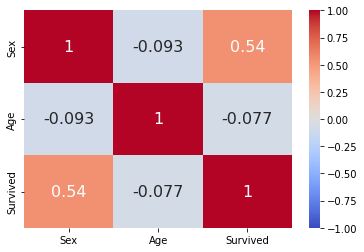

In [44]:
sns.heatmap(correlation_data.corr(), annot = True, cmap = 'coolwarm',
            vmin = -1, vmax = 1, annot_kws = {'size' : 16})

In [50]:
titanic_passengers.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [60]:
#Normalization Pclass value
titanic_passengers['Pclass'] = round(titanic_passengers['Pclass'] / 3, 2)
        

In [63]:
#Normalization of Fare value
titanic_passengers['Fare'] = round(titanic_passengers['Fare'] / titanic_passengers['Fare'].max(), 3)

In [72]:
#Creating new feature 'Rich'
titanic_passengers['Rich'] = titanic_passengers['Fare'] * titanic_passengers['Pclass']
titanic_passengers['Rich'] = round(titanic_passengers['Rich'] / titanic_passengers['Rich'].max(), 3)

In [71]:
titanic_passengers.head(30)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Rich
PassengerId,,,,,,,,,,,,
1,1.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014,NaN,S,0,0.047
2,0.3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139,C85,C,1,0.139
3,1.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015,NaN,S,1,0.050
4,0.3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.104,C123,S,1,0.104
5,1.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.016,NaN,S,0,0.053
6,1.0,"Moran, Mr. James",male,NaN,0,0,330877,0.017,NaN,Q,0,0.057
7,0.3,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,0.101,E46,S,0,0.101
8,1.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,0.041,NaN,S,0,0.137
9,1.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,0.022,NaN,S,1,0.073


In [77]:
new_corr = titanic_passengers[['Age', 'Sex', 'Rich', 'Survived']]
new_corr['Sex'] = (new_corr['Sex'] == 'female').astype(int)
new_corr.head()

/tmp/ipykernel_6406/3155867218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_corr['Sex'] = (new_corr['Sex'] == 'female').astype(int)


,Age,Sex,Rich,Survived
PassengerId,,,,
1,22.0,0,0.047,0
2,38.0,1,0.139,1
3,26.0,1,0.050,1
4,35.0,1,0.104,1
5,35.0,0,0.053,0


In [78]:
new_corr.corr()

,Age,Sex,Rich,Survived
Age,1.000000,-0.093254,-0.057475,-0.077221
Sex,-0.093254,1.000000,0.186055,0.543351
Rich,-0.057475,0.186055,1.000000,0.172340
Survived,-0.077221,0.543351,0.172340,1.000000


<AxesSubplot:>

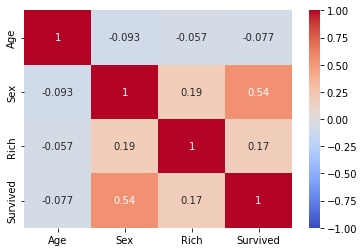

In [85]:
sns.heatmap(data = new_corr.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True)